In [1]:
import xarray as xr
import numpy as np

import sys
sys.path.append('../../')

import ndrought.wrangle as ndw

import matplotlib as mpl
import matplotlib.pyplot as plt

from tqdm.autonotebook import tqdm

/pool0/data/steinjao/drought/drought_impact/notebooks/explore/../../ndrought/wrangle.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
usdm = xr.open_dataset('/pool0/home/steinjao/data/drought/drought_impact/data/drought_measures/usdm/USDM_CONUS_105W_20000104_20220412.nc').load()

In [3]:
usdm_coarse = usdm['USDM'].coarsen(dim={'x':10, 'y':10}, boundary="trim").mean()

In [4]:
usdm_coarse

<xarray.DataArray 'USDM' (time: 1163, y: 121, x: 89)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * x        (x) float64 -2.943e+06 -2.918e+06 ... -7.146e+05 -6.889e+05
  * y        (y) float64 3.27e+06 3.244e+06 3.219e+06 ... 2.213e+05 1.956e+05
  * time     (time) datetime64[ns] 2000-01-04 2000-01-11 ... 2022-04-12
Attributes:
    crs_wkt:                      GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    semi_major_axis:              6378137.0
    semi_minor_axis:              6356752.314245179
    inverse_flattening:           298.257223563
    reference_ellipsoid_name:     WGS 84
    longitude_of_prime_meridian:  0.0
    prime_meridian_name:          Greenwich
    geographic_crs_name:          WGS 84
    grid_mapping_name:            latitude_longitude
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    GeoTransform:                 -125.12090760646159 0.025 0.0 49.6355481069...
    grid_mapping:                 spatial_ref

(array([1.82750158e+08, 9.20217000e+07, 8.34411990e+07, 7.70878620e+07,
        4.80220640e+07, 1.40226550e+07]),
 array([-1.        , -0.16666667,  0.66666667,  1.5       ,  2.33333333,
         3.16666667,  4.        ]),
 <BarContainer object of 6 artists>)

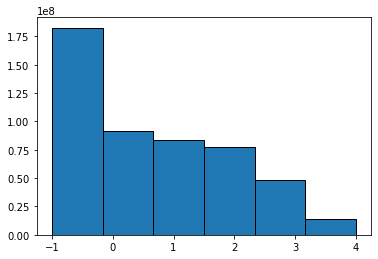

In [5]:
plt.hist(usdm['USDM'].values.flatten(), bins=6, edgecolor='k')

(array([1994319.,  919178.,  828804.,  771770.,  497258.,  163438.]),
 array([-1.        , -0.16666667,  0.66666667,  1.5       ,  2.33333333,
         3.16666667,  4.        ]),
 <BarContainer object of 6 artists>)

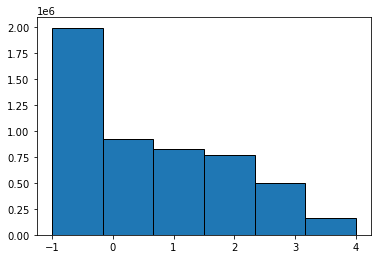

In [6]:
plt.hist(usdm_coarse.values.flatten(), bins=6, edgecolor='k')

In [7]:
usdm_vals = usdm['USDM'].values.flatten()
usdm_vals = usdm_vals[np.where(np.isnan(usdm_vals) == False)[0]]

In [8]:
usdm_coarse_vals = usdm_coarse.values.flatten()
usdm_coarse_vals = usdm_coarse_vals[np.where(np.isnan(usdm_coarse_vals) == False)[0]]

In [9]:
og_hist, og_bins = np.histogram(usdm_vals, bins=6)

In [10]:
coarse_hist, coarse_bins = np.histogram(usdm_coarse_vals, bins=6)

In [11]:
og_bins == coarse_bins

array([ True,  True,  True,  True,  True,  True,  True])

In [12]:
og_bins

array([-1.        , -0.16666667,  0.66666667,  1.5       ,  2.33333333,
        3.16666667,  4.        ])

Let's get now error based on distribution

In [13]:
1- (coarse_hist/np.max(coarse_hist))/(og_hist/np.max(og_hist))

array([ 0.        ,  0.08468095,  0.08980502,  0.08258671,  0.05113574,
       -0.06803608])

So if we take the mean for USDM, -1 is still the dominant value (neutral/wet), and we get a difference for 8% for D0, D1, and D2, then an error %5 for D3, while D4 gets bumped by 7%

In [14]:
def compare_histograms(a:xr.DataArray, b:xr.DataArray, bins=6):
    a_vals = a.values.flatten()
    a_vals = a_vals[np.where(np.isnan(a_vals)==False)[0]]

    b_vals = b.values.flatten()
    b_vals = b_vals[np.where(np.isnan(b_vals)==False)[0]]

    a_hist, __ = np.histogram(a_vals, bins=bins)
    b_hist, __ = np.histogram(b_vals, bins=bins)

    return 1-(a_hist/np.max(a_hist))/(b_hist/np.max(b_hist))

In [15]:
usdm_mean_coarse = usdm_coarse

In [16]:
usdm_median_coarse = usdm['USDM'].coarsen(dim={'x':10, 'y':10}, boundary='trim').median()

In [17]:
usdm_max_coarse = usdm['USDM'].coarsen(dim={'x':10, 'y':10}, boundary='trim').max()

In [18]:
usdm_min_coarse = usdm['USDM'].coarsen(dim={'x':10, 'y':10}, boundary='trim').min()

In [19]:
compare_histograms(usdm['USDM'], usdm_median_coarse)

array([ 0.        , -0.01469483, -0.01930028, -0.02439881, -0.0238461 ,
       -0.01083035])

In [20]:
compare_histograms(usdm['USDM'], usdm_max_coarse)

array([0.        , 0.05183943, 0.06366307, 0.09205927, 0.13944461,
       0.23159983])

In [21]:
compare_histograms(usdm['USDM'], usdm_min_coarse)

array([ 0.        , -0.08051965, -0.10274899, -0.15186201, -0.22875617,
       -0.36646543])

Okay, so the median captures the distribution the best it seems. Interesting that it looks to increase the size of the higher drought categories constantly ... I'm assuming that this then results in a sort of smear that favors drought over not.

In [22]:
from ndrought.plotting import usdm_cmap

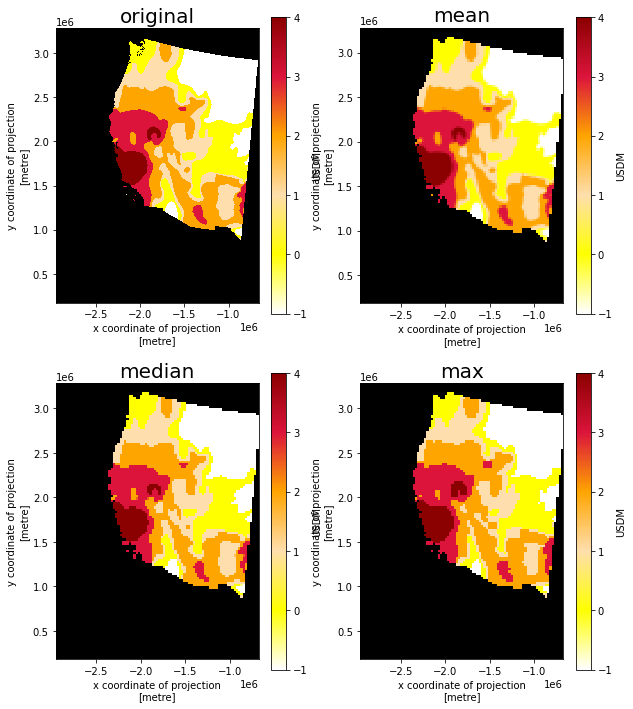

In [23]:
fig, axs = plt.subplots(2,2, figsize=(10,12))

for ax, da, name in zip(axs.ravel(), [usdm['USDM'], usdm_mean_coarse, usdm_median_coarse, usdm_max_coarse], ['original', 'mean', 'median', 'max']):
    da.isel(time=738).plot(vmin=-1, vmax=4, cmap=usdm_cmap(), ax=ax)
    ax.set_title(name, fontsize=20)
    ax.set_facecolor('k')
    ax.set_aspect('equal')

fig.set_facecolor('w')

Now let's try to implement `DCVW` as described in this [paper](https://www.tandfonline.com/doi/full/10.1080/22797254.2020.1847603)

In [24]:
usdm_da = xr.open_dataset('/pool0/home/steinjao/data/drought/drought_impact/data/drought_measures/usdm/USDM_CONUS_105W_20000104_20220412.nc')['USDM'].load()

The paper says they use a quadratic polynomial, so we'll go to degree 2

In [25]:
usdm_polyfit = usdm_da.polyfit(dim="time", deg=2)

In [26]:
usdm_polyfit

<xarray.Dataset>
Dimensions:               (degree: 3, y: 1214, x: 897)
Coordinates:
  * degree                (degree) int64 2 1 0
  * y                     (y) float64 3.281e+06 3.279e+06 ... 1.739e+05
  * x                     (x) float64 -2.955e+06 -2.952e+06 ... -6.595e+05
Data variables:
    polyfit_coefficients  (degree, y, x) float64 nan nan nan nan ... nan nan nan

In [27]:
usdm_polyfit['polyfit_coefficients'].isel(x=500, y=500)

<xarray.DataArray 'polyfit_coefficients' (degree: 3)>
array([ 5.18220696e-36, -1.26665850e-17,  8.22029515e+00])
Coordinates:
  * degree   (degree) int64 2 1 0
    y        float64 2e+06
    x        float64 -1.674e+06

In [28]:
usdm_coarse_func = usdm_da.coarsen(dim={'x':10, 'y':10}, boundary='trim')

In [29]:
np.unique(np.array([3,4,3]), return_counts=True)[0]

array([3, 4])

In [30]:
# https://stackoverflow.com/questions/75041095/how-to-apply-a-custom-function-to-xarray-dataarray-coarsen-reduce

def find_mode(window, axis=None, **kwargs):
    # find the mode over all axes 
    print(window.shape)
    """
    # this is our original scheme
    for t in window:
        for new_y in t:
            for old_y in new_y:
                for new_x in old_y:
                    for old_x in new_x:
                        print(old_x)
    """

    win_shape = window.shape
    win_reshaped = np.reshape(window, (win_shape[0], win_shape[1], win_shape[3], win_shape[2], win_shape[4]))
    print(win_reshaped.shape)

    ret = np.nan*np.zeros((win_shape[0], win_shape[1], win_shape[3]))

    prog = tqdm(total=(win_shape[0]*win_shape[1]*win_shape[3]))

    for t, yx_win in enumerate(win_reshaped):
        for y, x_win in enumerate(yx_win):
            for x, win in enumerate(x_win):
                uniq = np.unique(win, return_counts=True)
                mode = uniq[0][np.argmax(uniq[1])]
                ret[t, y, x] = mode
                prog.update()
                    

    return ret

In [31]:
usdm_coarsen_mode = usdm_coarse_func.reduce(find_mode)

(1163, 121, 10, 89, 10)
(1163, 121, 89, 10, 10)


  0%|          | 0/12524347 [00:00<?, ?it/s]

In [32]:
usdm_poly_coeff = usdm_polyfit['polyfit_coefficients']

In [33]:
usdm_trend_surface = usdm_poly_coeff.isel(degree=0)+usdm_poly_coeff.isel(degree=1)*usdm_da+usdm_poly_coeff.isel(degree=2)*(usdm_da**2)

In [34]:
usdm_trend_surface.values.shape

(1214, 897, 1163)

In [35]:
def dcvw(window, axis=None, **kwargs):
    win_shape = window.shape
    win_reshaped = np.reshape(window, (win_shape[0], win_shape[1], win_shape[3], win_shape[2], win_shape[4]))

    win_reshaped_da = xr.DataArray(win_reshaped, dims=('t', 'y', 'x', 'win_y', 'win_x'))
    #print(win_reshaped_da)

    print("Fitting Trend Surface")
    polyfit_coeff = win_reshaped_da.polyfit(dim="t", deg=2)['polyfit_coefficients'].values

    upscaled = np.nan*np.zeros((win_shape[0], win_shape[1], win_shape[3]))

    print("Computing DCVW")
    prog = tqdm(total=(win_shape[0]*win_shape[1]*win_shape[3]), desc='Upscaling')

    for t, yx_win in enumerate(win_reshaped):
        for y, x_win in enumerate(yx_win):
            for x, win in enumerate(x_win):
                uniq = np.unique(win, return_counts=True)
                mode = uniq[0][np.argmax(uniq[1])]

                trend_win_d0 = polyfit_coeff[0, y, x, :, :]
                trend_win_d1 = polyfit_coeff[1, y, x, :, :]
                trend_win_d2 = polyfit_coeff[2, y, x, :, :]

                trend_surf = trend_win_d0 + trend_win_d1*win + trend_win_d2*(win**2)

                w_numer = 1/((trend_surf-mode)**2)
                w_denom = (1/((trend_surf-mode)**2)).sum()
                w = w_numer/w_denom


                upscaled[t, y, x] = (w*trend_surf).sum()
                prog.update()

    return upscaled

In [37]:
usdm_dcvw_upscale = usdm_da.coarsen(dim={'x':10, 'y':10}, boundary='trim').reduce(dcvw)
usdm_dcvw_upscale

Fitting Trend Surface
Computing DCVW


Upscaling:   0%|          | 0/12524347 [00:00<?, ?it/s]

<xarray.DataArray 'USDM' (time: 1163, y: 121, x: 89)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * x        (x) float64 -2.943e+06 -2.918e+06 ... -7.146e+05 -6.889e+05
  * y        (y) float64 3.27e+06 3.244e+06 3.219e+06 ... 2.213e+05 1.956e+05
  * time     (time) datetime64[ns] 2000-01-04 2000-01-11 ... 2022-04-12
Attributes:
    crs_wkt:                      GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    semi_major_axis:              6378137.0
    semi_minor_axis:              6356752.314245179
    inverse_flattening:           298.257223563
    reference_ellipsoid_name:     WGS 84
    longitude_of_prime_meridian:  0.0
    prime_meridian_name:          Greenwich
    geographic_crs_name:          WGS 84
    grid_mapping_name:            latitude_longitude
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    GeoTransform:                 -125.12090760646159 0.025 0.0 49.6355481069...
    grid_mapping:                 spatial_ref

(1163, 1214, 897)
(1163, 121, 89)
(1163, 121, 89)
(1163, 121, 89)


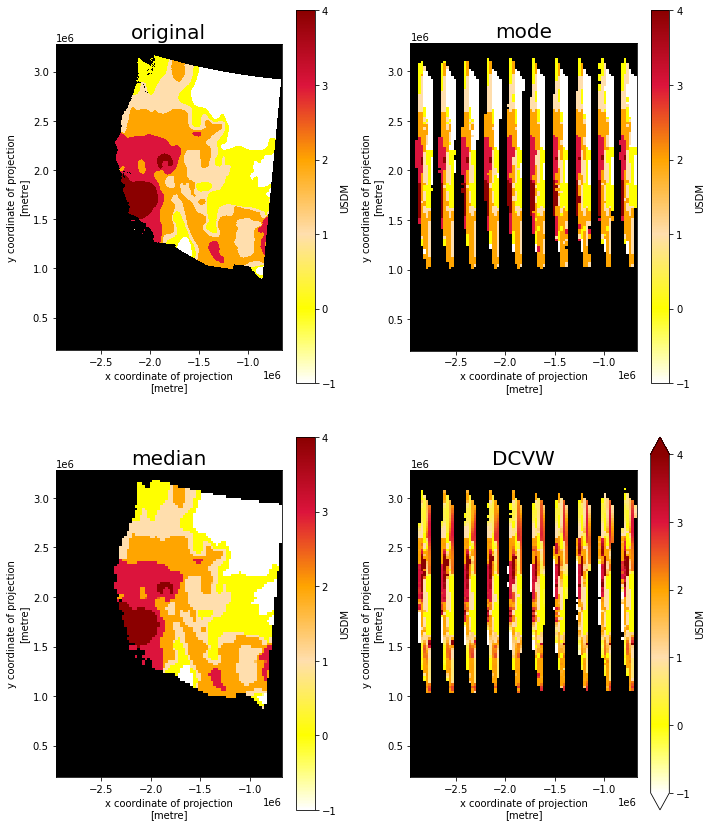

In [52]:
fig, axs = plt.subplots(2,2, figsize=(10,12))

for ax, da, name in zip(axs.ravel(), [usdm['USDM'], usdm_coarsen_mode, usdm_median_coarse, usdm_dcvw_upscale], ['original', 'mode', 'median', 'DCVW']):
    da.isel(time=738).plot(vmin=-1, vmax=4, cmap=usdm_cmap(), ax=ax)
    print(da.shape)
    ax.set_title(name, fontsize=20)
    ax.set_facecolor('k')
    ax.set_aspect('equal')

fig.set_facecolor('w')

plt.tight_layout()

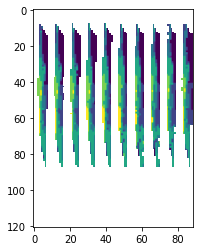

In [49]:
plt.imshow(usdm_coarsen_mode.isel(time=738))

In [50]:
usdm_coarsen_mode

<xarray.DataArray 'USDM' (time: 1163, y: 121, x: 89)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * x        (x) float64 -2.943e+06 -2.918e+06 ... -7.146e+05 -6.889e+05
  * y        (y) float64 3.27e+06 3.244e+06 3.219e+06 ... 2.213e+05 1.956e+05
  * time     (time) datetime64[ns] 2000-01-04 2000-01-11 ... 2022-04-12
Attributes:
    crs_wkt:                      GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    semi_major_axis:              6378137.0
    semi_minor_axis:              6356752.314245179
    inverse_flattening:           298.257223563
    reference_ellipsoid_name:     WGS 84
    longitude_of_prime_meridian:  0.0
    prime_meridian_name:          Greenwich
    geographic_crs_name:          WGS 84
    grid_mapping_name:            latitude_longitude
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    GeoTransform:                 -125.12090760646159 0.025 0.0 49.6355481069...
    grid_mapping:                 spatial_ref

In [48]:
usdm_coarsen_mode.values.shape

(1163, 121, 89)

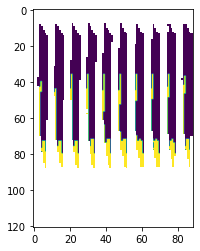

In [53]:
plt.imshow(usdm_coarsen_mode.values[0, :, :])

Okay, that's not right

In [39]:
#https://stackoverflow.com/questions/70340835/coarsen-xarray-dataarray-with-weighted-mean
usdm_windowed = usdm_coarse_func.construct(
    x=("x_coarse", "x_window"),
    y=("y_coarse", "y_window")
)
usdm_windowed

<xarray.DataArray 'USDM' (time: 1163, y_coarse: 121, y_window: 10, x_coarse: 89, x_window: 10)>
array([[[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
...
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]]]])
Coordinates:
    x        (x_coarse, x_window) float64 -2.955e+06 -2.952e+06 ... -6.774e+05
    y        (y_coarse, y_window) float64 3.281e+06 3.279e+06 ... 1.841e+05
  * time     (time) datetime64[ns] 2000-01-04 2000-01-11 ... 2022-04-12
Dimensions without coordinates: y_coarse, y_window, x_coarse, x_window
Attributes:
    crs_wkt:                      GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    semi_major_axis:              6378137.0
    semi_minor_axis:              6356752.314245179
    inverse_flattening:           298.257223563
    reference_ellipsoid_name:     WGS 84
    longitude_of_prime_meridian:  0.0
    prime_meridian_name:          Greenwich
    geographic_crs_name:          WGS 84
    grid_mapping_name:            latitude_longitude
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    GeoTransform:                 -125.12090760646159 0.025 0.0 49.6355481069...
    grid_mapping:                 spatial_ref

In [40]:
usdm_windowed.sum(['x_window', 'y_window'])

<xarray.DataArray 'USDM' (time: 1163, y_coarse: 121, x_coarse: 89)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-04 2000-01-11 ... 2022-04-12
Dimensions without coordinates: y_coarse, x_coarse

I'm gonna split this into part 2